<a href="https://colab.research.google.com/github/amanjigithub/Fruit-vagitable_classificaition/blob/main/fruitclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

##Data Preprocessing

##Training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


##Building Model

In [ ]:
 cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

##Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=35)

Epoch 1/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 745s 8s/step - accuracy: 0.0227 - loss: 20.6330 - val_accuracy: 0.0285 - val_loss: 3.5831
Epoch 2/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.0280 - loss: 3.5815 - val_accuracy: 0.0313 - val_loss: 3.5134
Epoch 3/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.0326 - loss: 3.5774 - val_accuracy: 0.0285 - val_loss: 3.5841
Epoch 4/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.0321 - loss: 3.5817 - val_accuracy: 0.0285 - val_loss: 3.5839
Epoch 5/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.0334 - loss: 3.5783 - val_accuracy: 0.0399 - val_loss: 3.5773
Epoch 6/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.0272 - loss: 3.5712 - val_accuracy: 0.0456 - val_loss: 3.5716
Epoch 7/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.0340 - loss: 3.5597 - val_accuracy: 0.0912 - val_loss: 3.4791
Epoch 8/35
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.0480 - loss: 3.5308 - val_accuracy: 0.0427 - 

##Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 775ms/step - accuracy: 0.8494 - loss: 0.5500
Training accuracy: 0.8590690493583679


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8756 - loss: 0.5449
Validation accuracy: 0.8547008633613586


##Saving Model

In [ ]:
cnn.save('/content/drive/MyDrive/trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.026003209874033928,
  0.0272873193025589,
  0.03402889147400856,
  0.03210273012518883,
  0.03402889147400856,
  0.03146067261695862,
  0.04141252115368843,
  0.05264847353100777,
  0.04269662871956825,
  0.062279295176267624,
  0.07768860459327698,
  0.09470304846763611,
  0.12038522958755493,
  0.15248796343803406,
  0.17463883757591248,
  0.21412520110607147,
  0.25361156463623047,
  0.30176565051078796,
  0.3544141352176666,
  0.3906902074813843,
  0.4301765561103821,
  0.48988765478134155,
  0.5332263112068176,
  0.5332263112068176,
  0.5900481343269348,
  0.6064205169677734,
  0.6382022500038147,
  0.645906925201416,
  0.6786516904830933,
  0.6956661343574524,
  0.6873193979263306,
  0.7191011309623718,
  0.7319422364234924,
  0.7380417585372925,
  0.7659711241722107],
 'loss': [7.934755802154541,
  3.580454111099243,
  3.580033540725708,
  3.581514358520508,
  3.5789332389831543,
  3.56941556930542,
  3.559415817260742,
  3.5165207386016846,
  3.529824733734131,


In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 85.47008633613586 %


##Accuracy Visualization

##Training Visualization

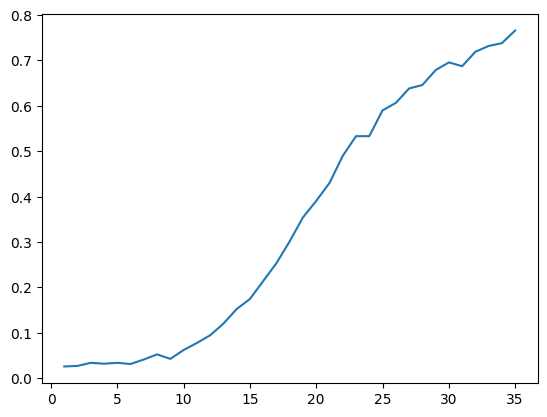

In [ ]:
epochs = [i for i in range(1,36)]
plt.plot(epochs,training_history.history['accuracy'])

In [ ]:
training_history.history['accuracy']

[0.026003209874033928,
 0.0272873193025589,
 0.03402889147400856,
 0.03210273012518883,
 0.03402889147400856,
 0.03146067261695862,
 0.04141252115368843,
 0.05264847353100777,
 0.04269662871956825,
 0.062279295176267624,
 0.07768860459327698,
 0.09470304846763611,
 0.12038522958755493,
 0.15248796343803406,
 0.17463883757591248,
 0.21412520110607147,
 0.25361156463623047,
 0.30176565051078796,
 0.3544141352176666,
 0.3906902074813843,
 0.4301765561103821,
 0.48988765478134155,
 0.5332263112068176,
 0.5332263112068176,
 0.5900481343269348,
 0.6064205169677734,
 0.6382022500038147,
 0.645906925201416,
 0.6786516904830933,
 0.6956661343574524,
 0.6873193979263306,
 0.7191011309623718,
 0.7319422364234924,
 0.7380417585372925,
 0.7659711241722107]

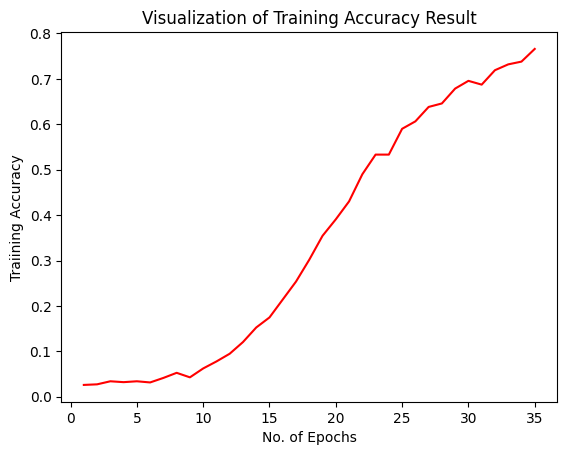

In [ ]:
epochs = [i for i in range(1,36)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

## Validation Accuracy

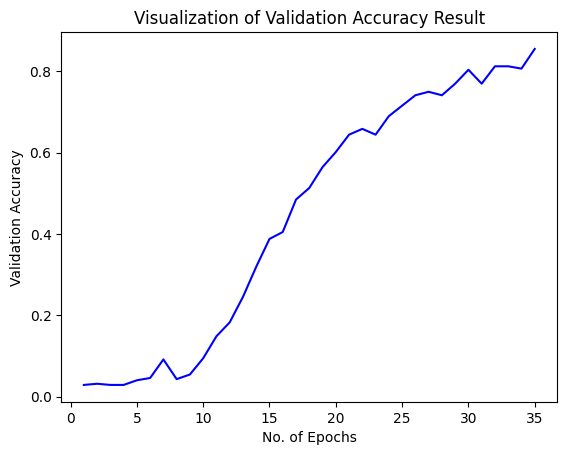

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

## Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.8432 - loss: 0.6720
Test accuracy: 0.8579387068748474
